# Problem Statement - Part I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Loading Dataset

In [1]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.19.5 | Pandas version: 1.2.3 | Seaborn version: 0.11.2'

In [2]:
# Importing the data for analysis
data = pd.read_csv('train.csv')

In [3]:
# Displaying top 5 rows from data
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{data.shape}')


Shape of dataframe:
(1460, 81)


In [5]:
print(f'\nCount of dataframe:\n{data.count()}')


Count of dataframe:
Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF   

In [6]:
print(f'\nColumns in dataframe:\n{data.columns}')


Columns in dataframe:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'G

In [7]:
print(f'\nDescription of dataframe:\n{data.describe().T}')


Description of dataframe:
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF

In [8]:
print(f'\nNull values in dataframe:\n{data.isnull().sum()}')


Null values in dataframe:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFl

**Observation**:
1. There are 1460 rows and 81 columns in dataframe
2. These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
3. The dataset is not clean, i.e. consists of missing values as well

## Cleaning Dataset

In [9]:
# Dropping duplicate rows in dataset, if exist
data = data.drop_duplicates()
print(f'\nShape of dataframe:\n{data.shape}')
data.head()


Shape of dataframe:
(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
# Removing index field
data.drop(['Id'], axis=1, inplace=True)

In [11]:
print(((data.isnull().sum()/data.shape[0])*100).round(2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

### Certain columns have greater than 30% missing values so we will be removing them as there iis less data i.e 1460 rows

    -Alley
    -PoolQC
    -Miscfeature
    -Fence
    -FireplaceQu

In [12]:
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(((data.isnull().sum()/data.shape[0])*100).round(2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [13]:
# Analysing columns which still have NaN values
print(data['MasVnrType'].describe(), end='\n\n')      # 0.55% NaN
print(data['LotFrontage'].describe(), end='\n\n')      # 17.74% NaN
print(data['MasVnrArea'].describe(), end='\n\n')      # 0.55% NaN
print(data['BsmtQual'].describe(), end='\n\n')        # 2.53% NaN
print(data['BsmtCond'].describe(), end='\n\n')        # 2.53% NaN
print(data['BsmtExposure'].describe(), end='\n\n')    # 2.60% NaN
print(data['BsmtFinType1'].describe(), end='\n\n')    # 2.53% NaN
print(data['BsmtFinType2'].describe(), end='\n\n')    # 2.60% NaN
print(data['Electrical'].describe(), end='\n\n')      # 0.07% NaN
print(data['GarageType'].describe(), end='\n\n')      # 5.55% NaN
print(data['GarageYrBlt'].describe(), end='\n\n')     # 5.55% NaN
print(data['GarageFinish'].describe(), end='\n\n')    # 5.55% NaN
print(data['GarageQual'].describe(), end='\n\n')      # 5.55% NaN
print(data['GarageCond'].describe(), end='\n\n')      # 5.55% NaN

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top

In [14]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [15]:
print(((data.isnull().sum()/data.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

In [16]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
data.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(data.shape)
print(((data.isnull().sum()/data.shape[0])*100).round(2))

(1338, 75)
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
Fu

In [17]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
data['DiffYearBuilt'] = pd.datetime.now().year - data['YearBuilt']
data['DiffYearRemodAdd'] = pd.datetime.now().year - data['YearRemodAdd']
data['DiffGarageYrBlt'] = pd.datetime.now().year - data['GarageYrBlt']

In [18]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# TARGET COLUMN:
target = 'SalePrice'

# NUMERICAL COLUMNS: 
num_col = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',data[col].unique())

31
43
MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

**Observation**:
1. There are 1338 rows and 78 columns in cleaned dataframe

## Exploratory Data Analysis

In [19]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=data[[col_i,col_o]])

In [20]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = data[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=data[[col_i,col_o]], order=my_order.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Timber'),
  Text(16, 0, 'Gilbert'),
  Text(17, 0, 'StoneBr'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'Edwards'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

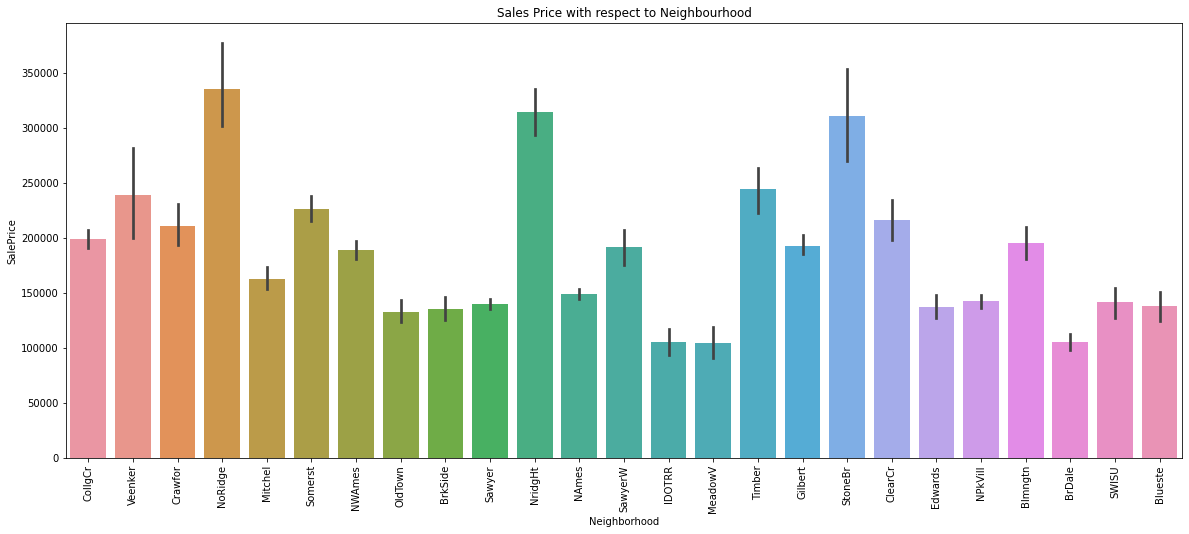

In [21]:
# plot 'Sale Price' with respect to 'Neighborhood'
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9')])

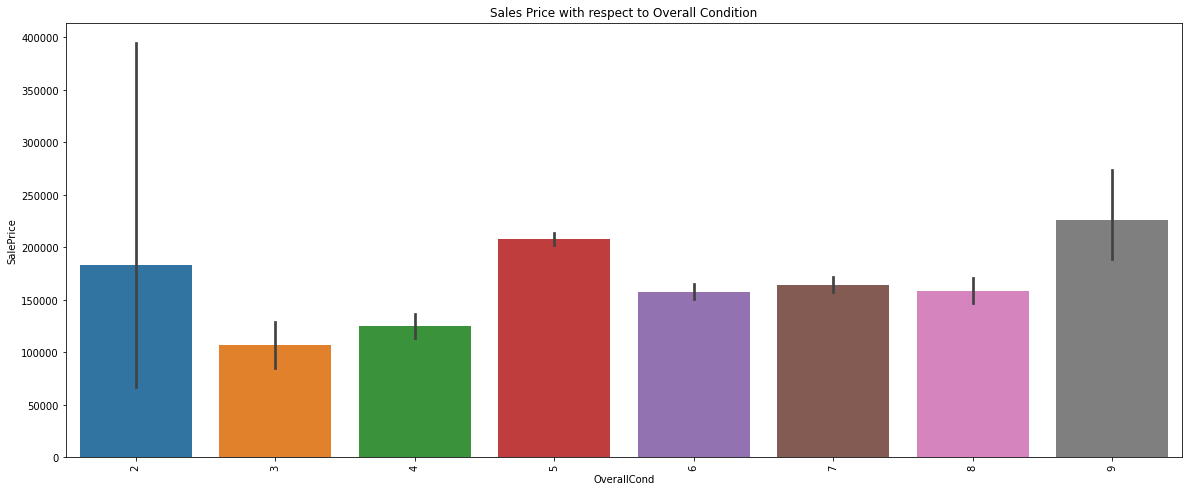

In [22]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

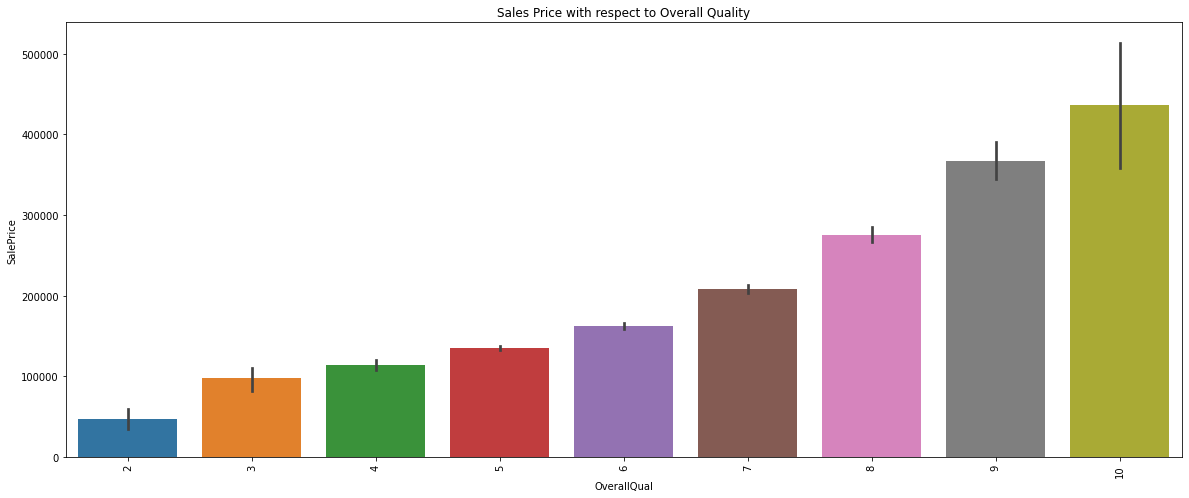

In [23]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

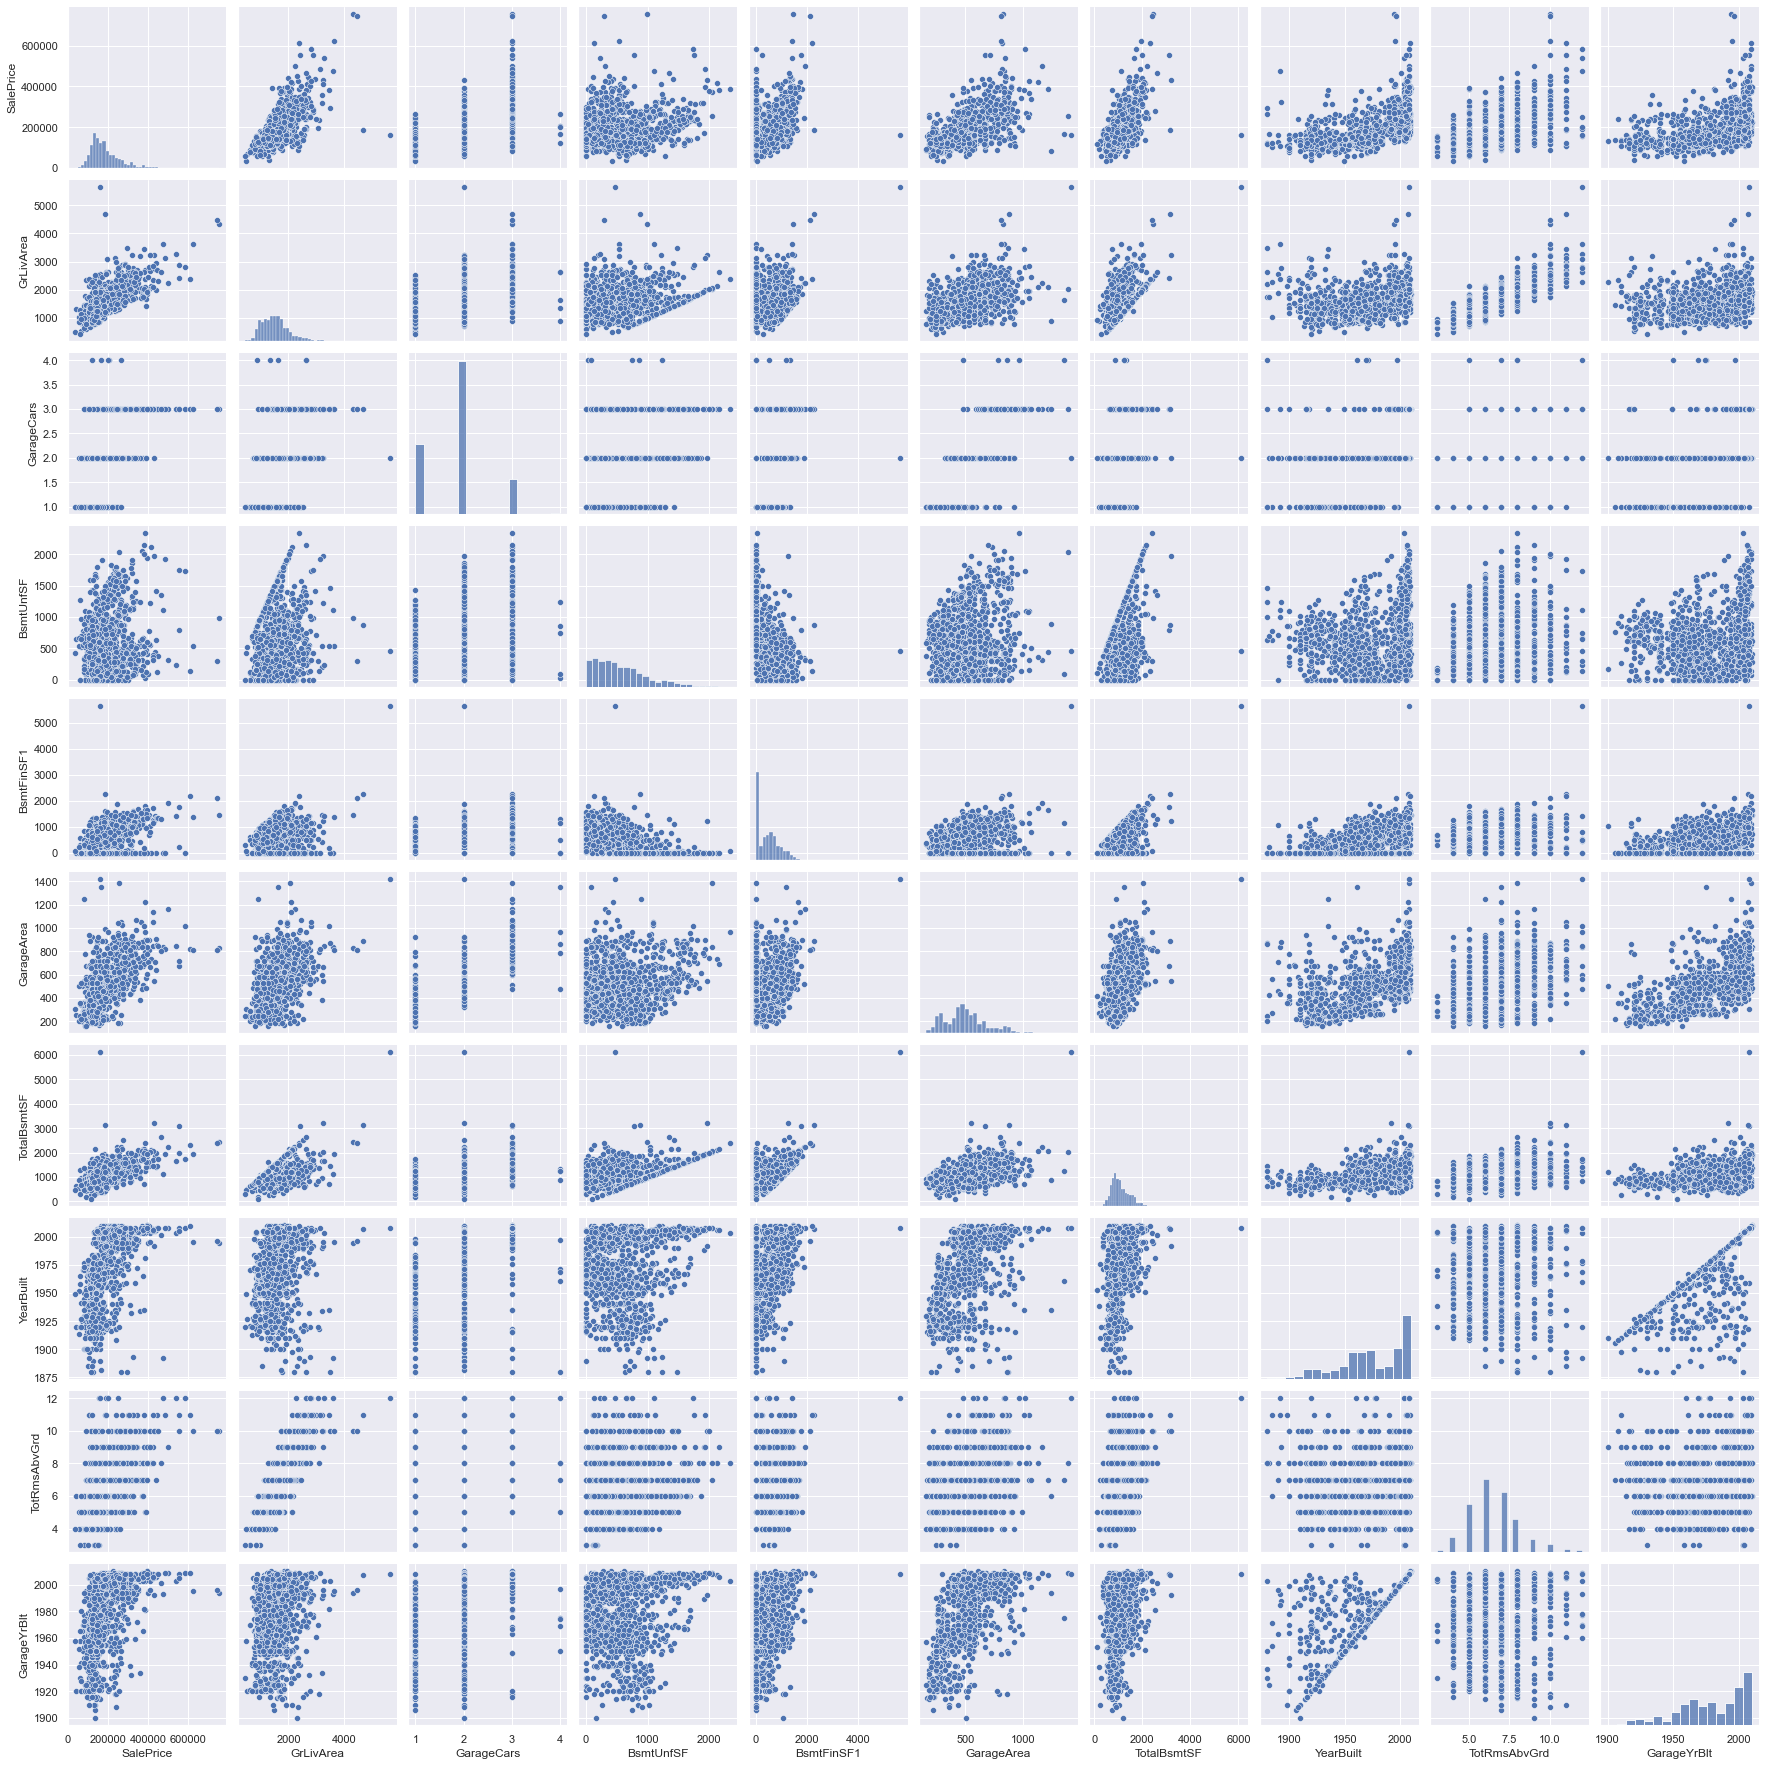

In [24]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

<Figure size 432x288 with 0 Axes>

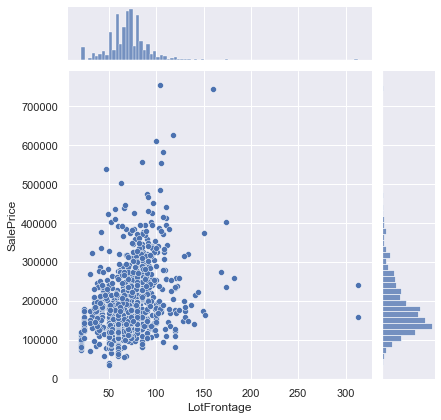

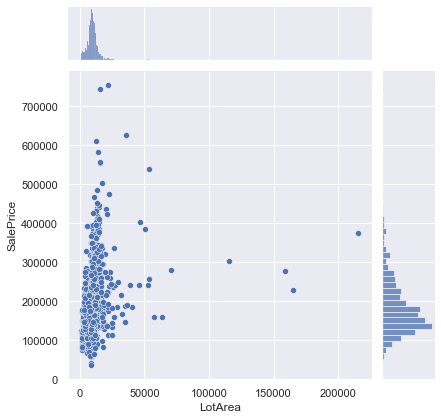

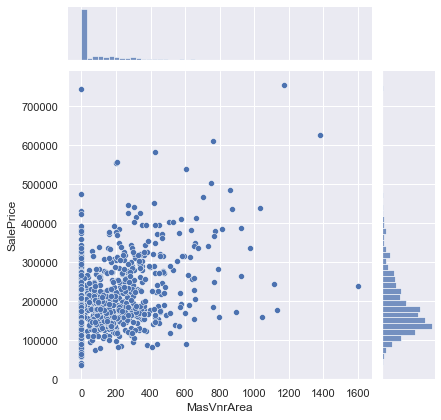

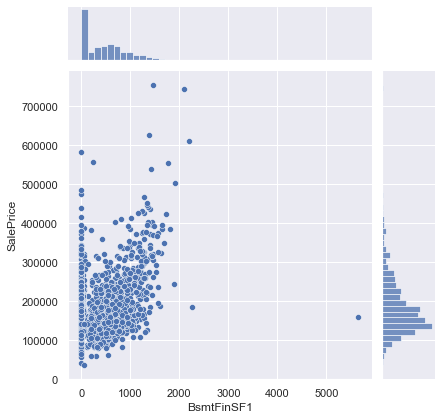

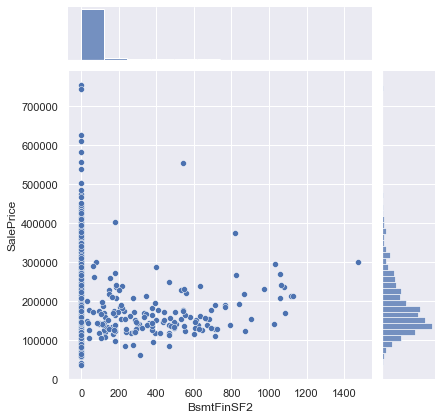

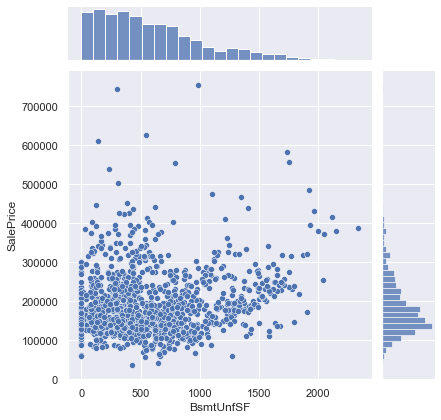

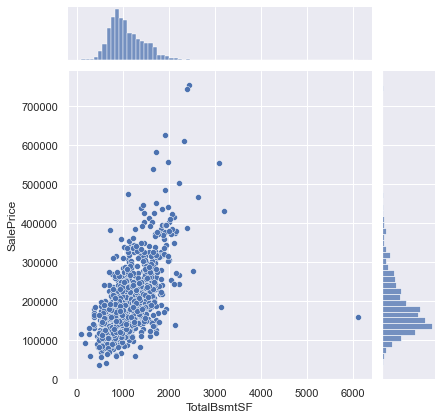

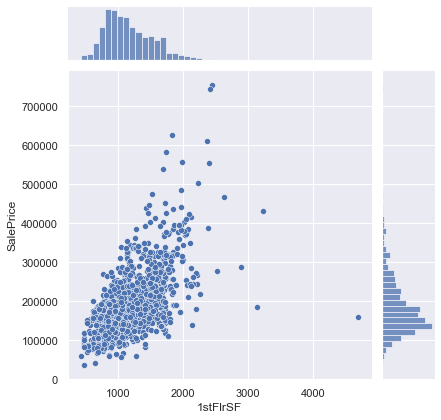

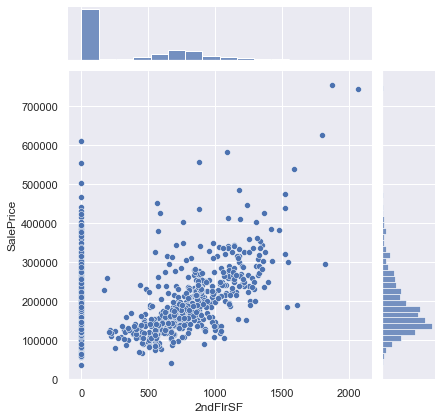

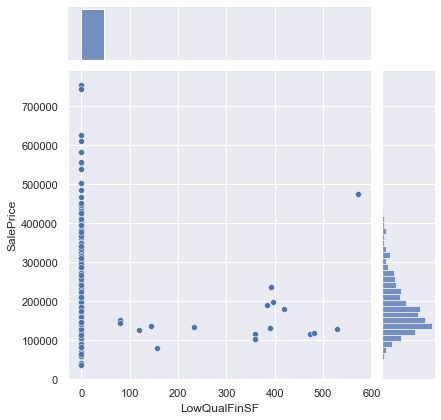

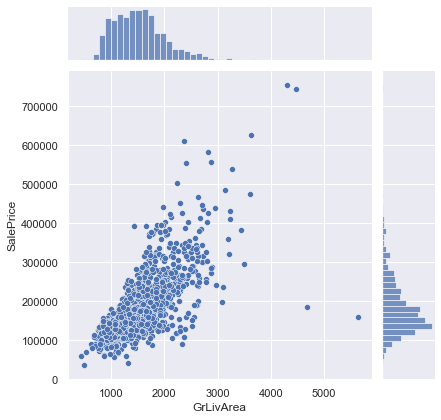

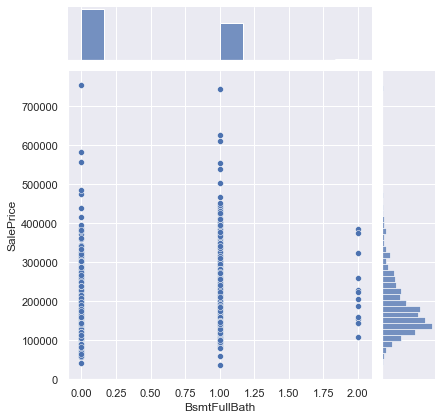

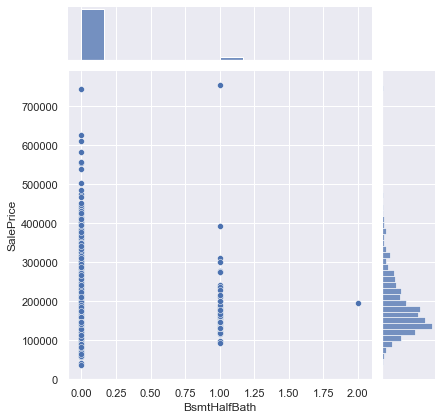

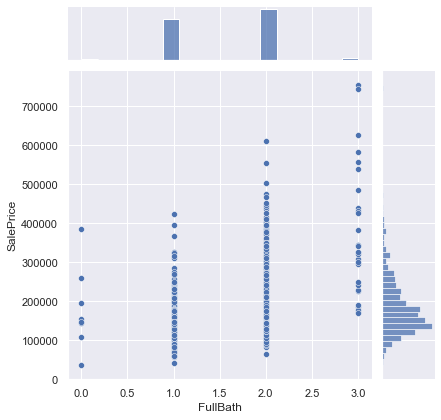

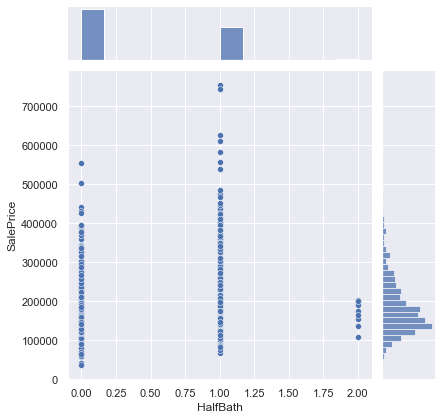

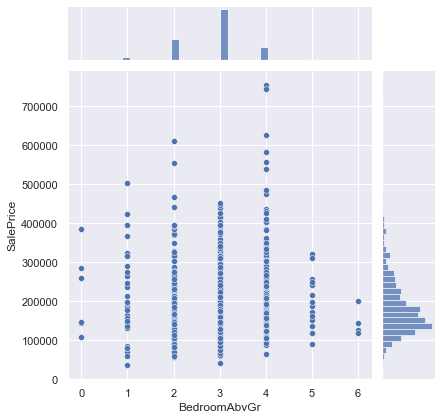

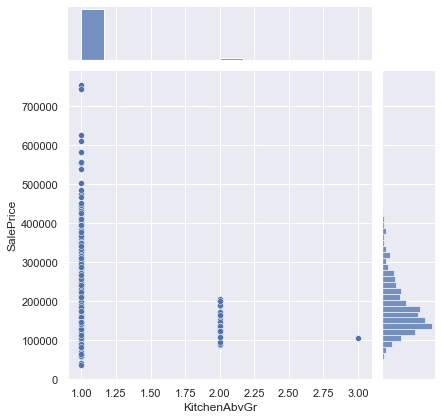

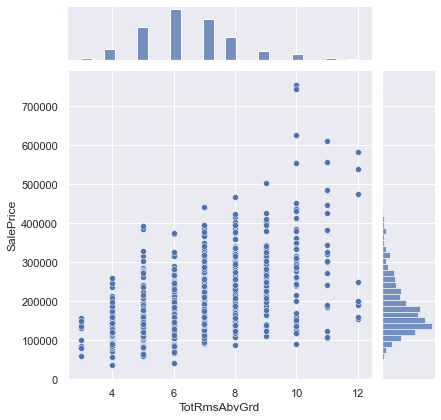

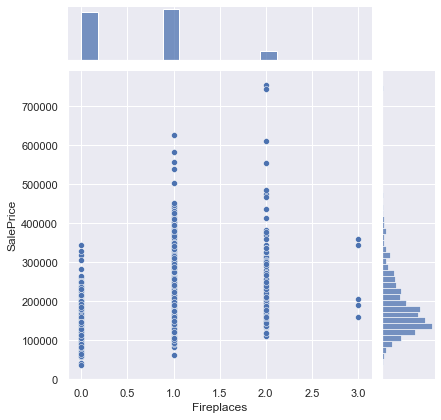

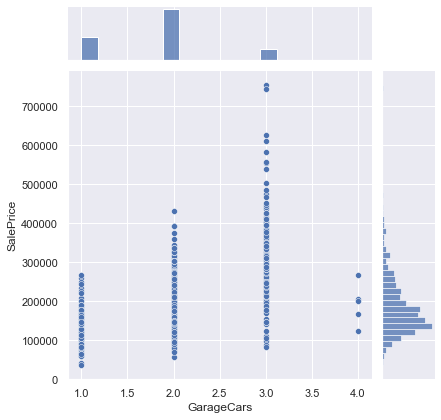

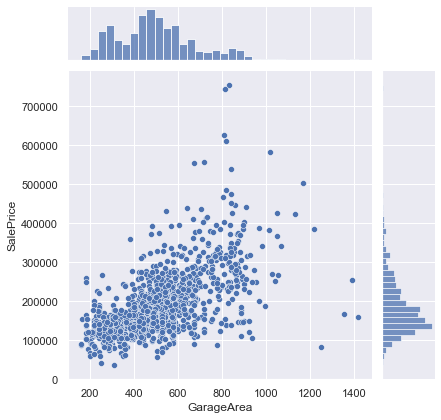

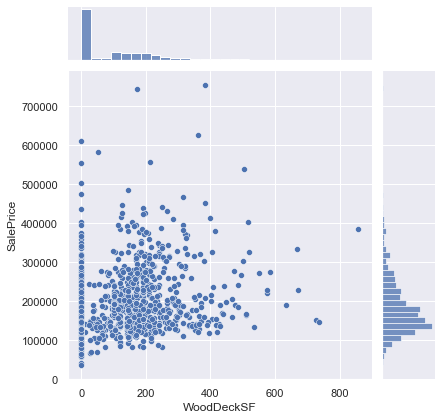

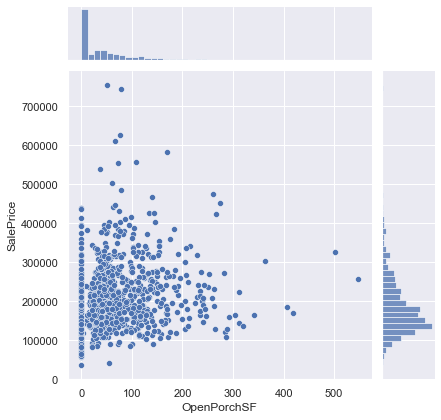

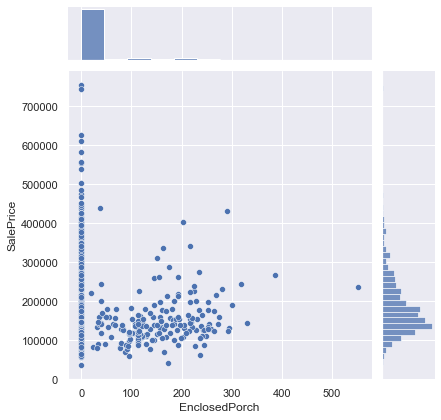

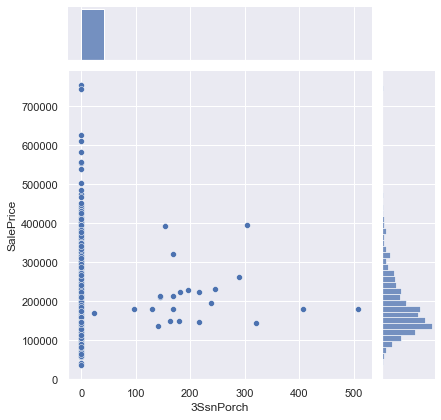

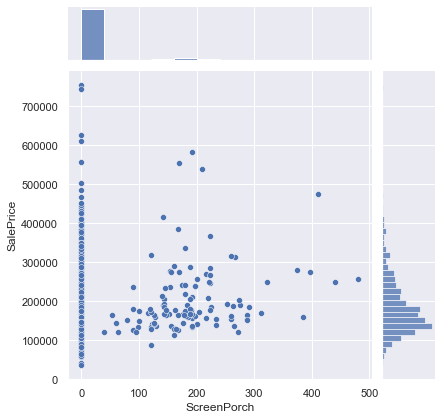

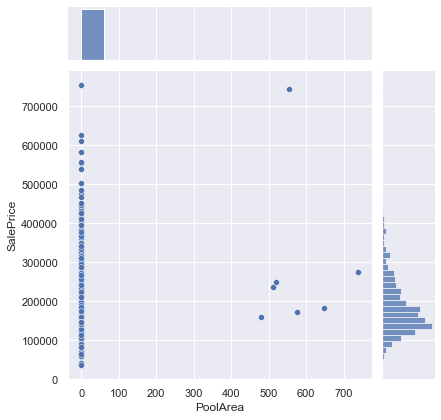

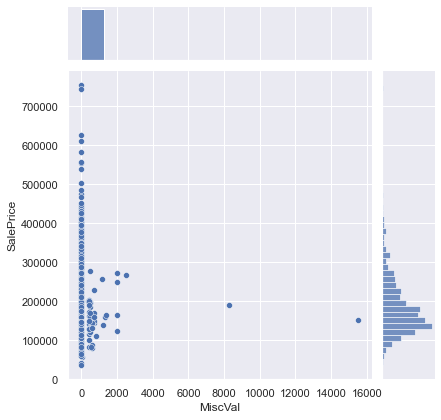

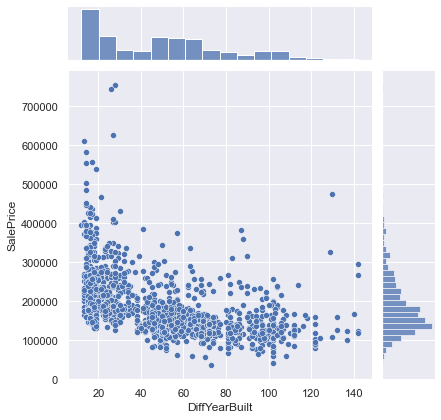

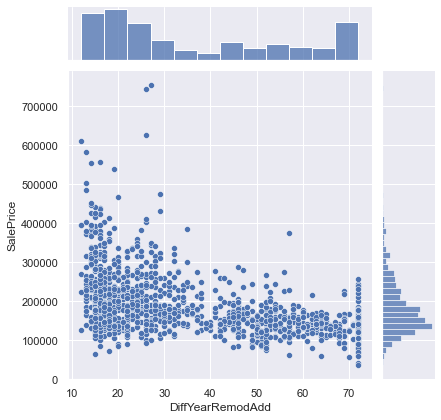

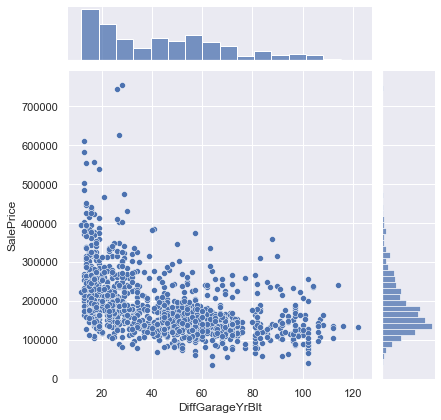

In [25]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
#     print(i)
    num_col_analysis(i, col, target)

<Figure size 432x288 with 0 Axes>

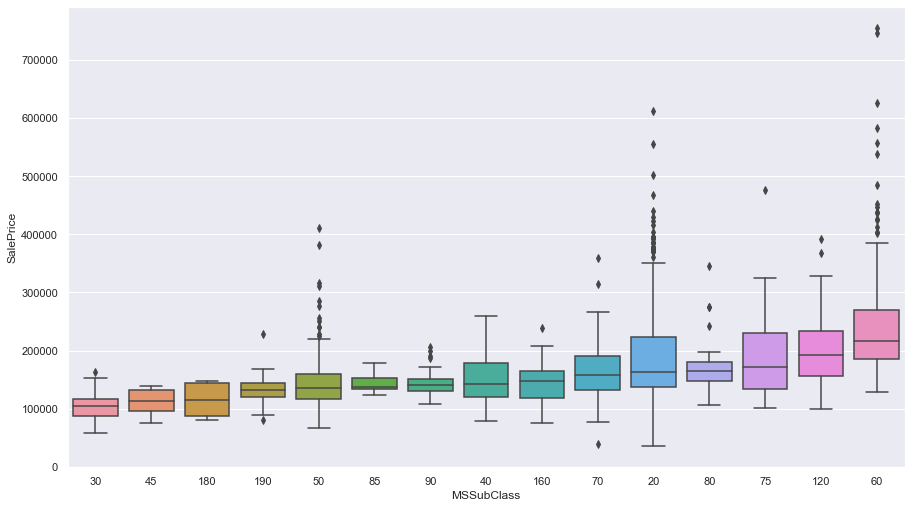

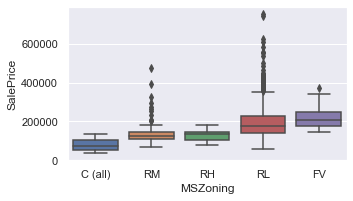

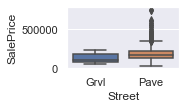

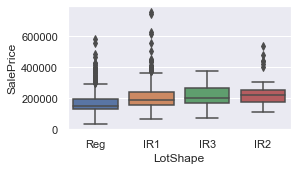

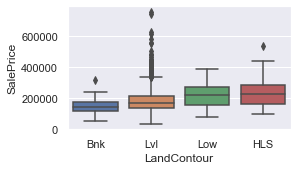

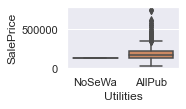

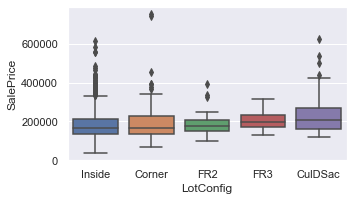

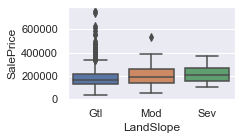

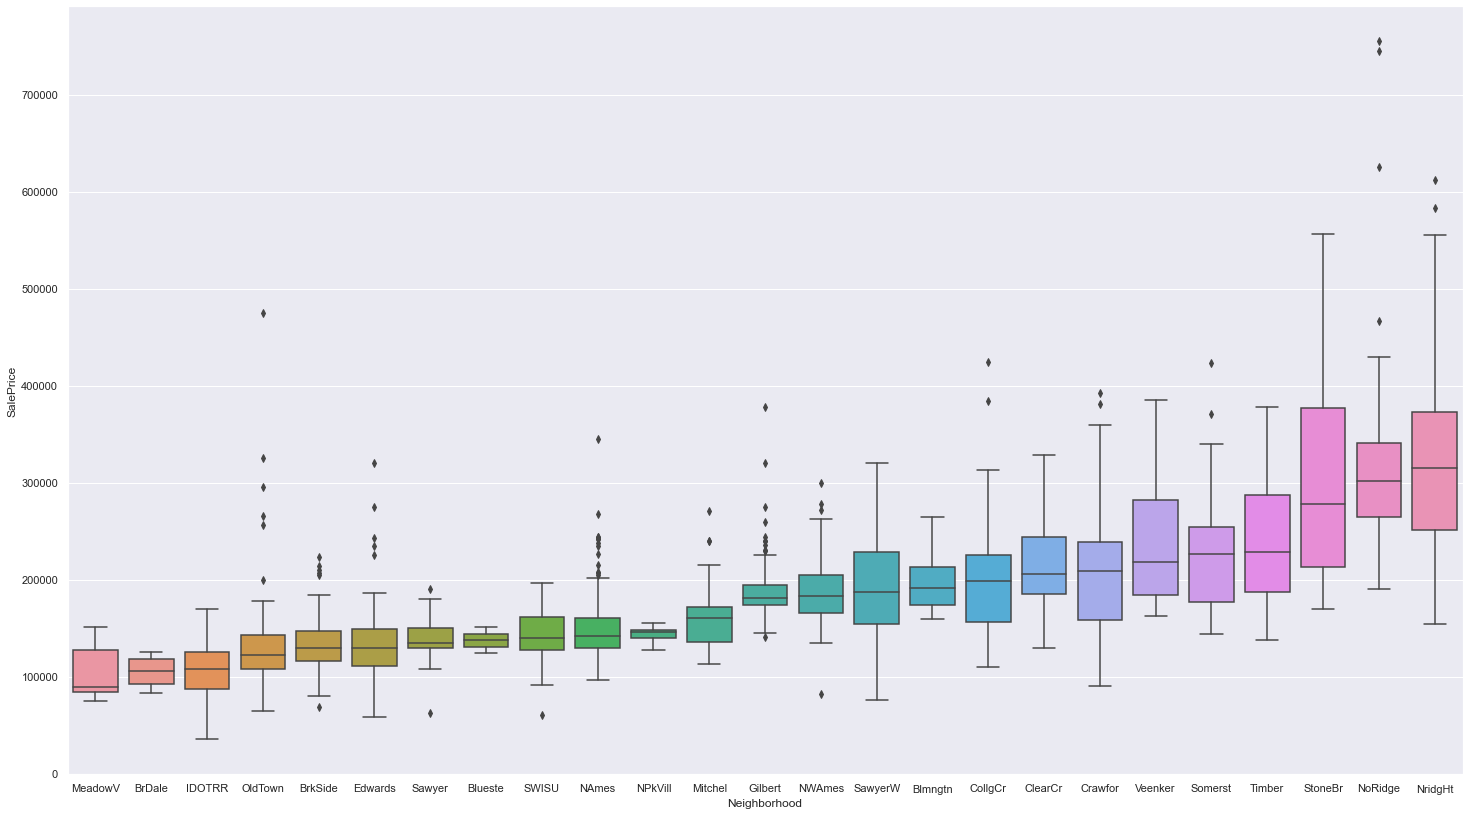

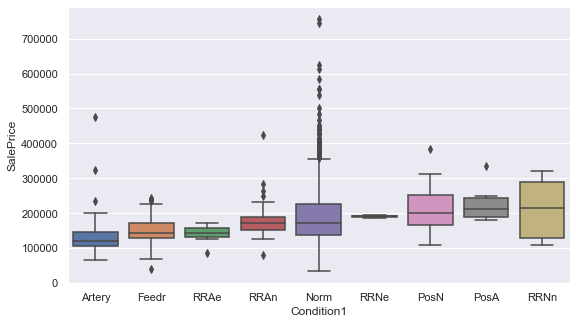

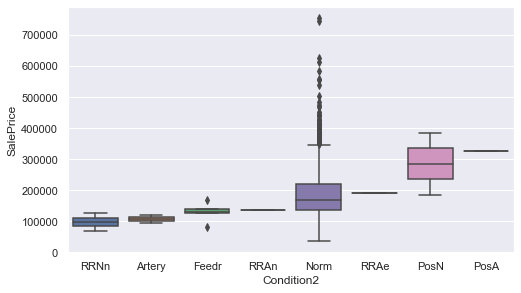

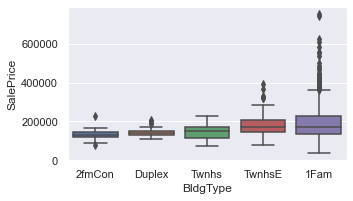

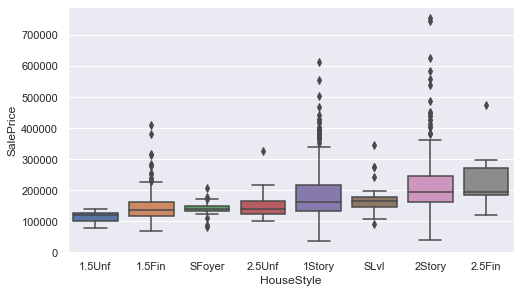

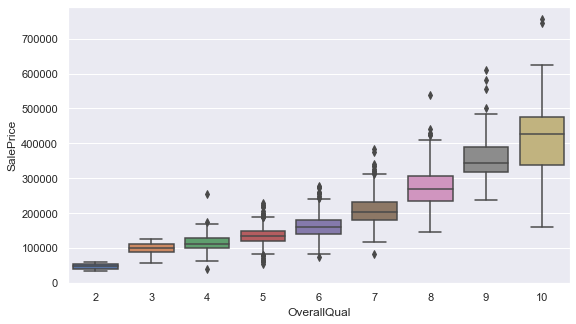

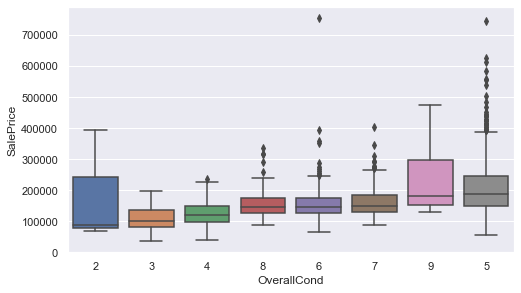

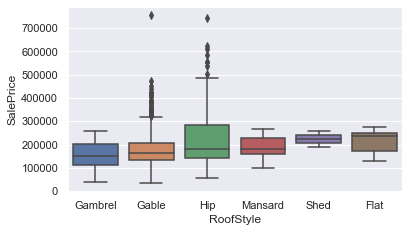

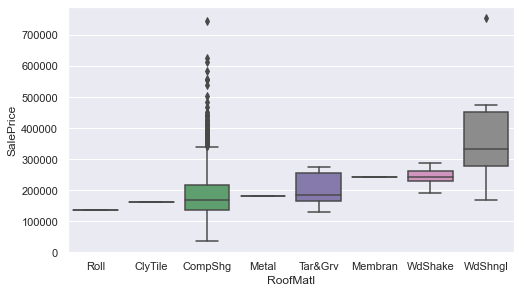

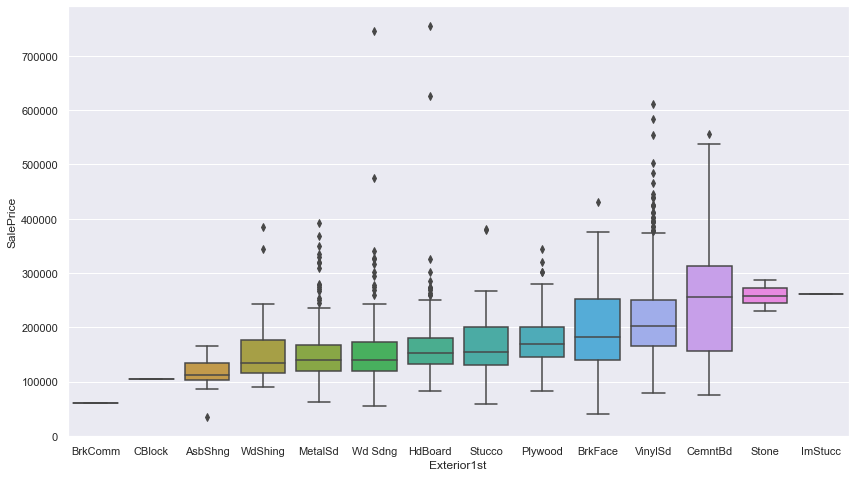

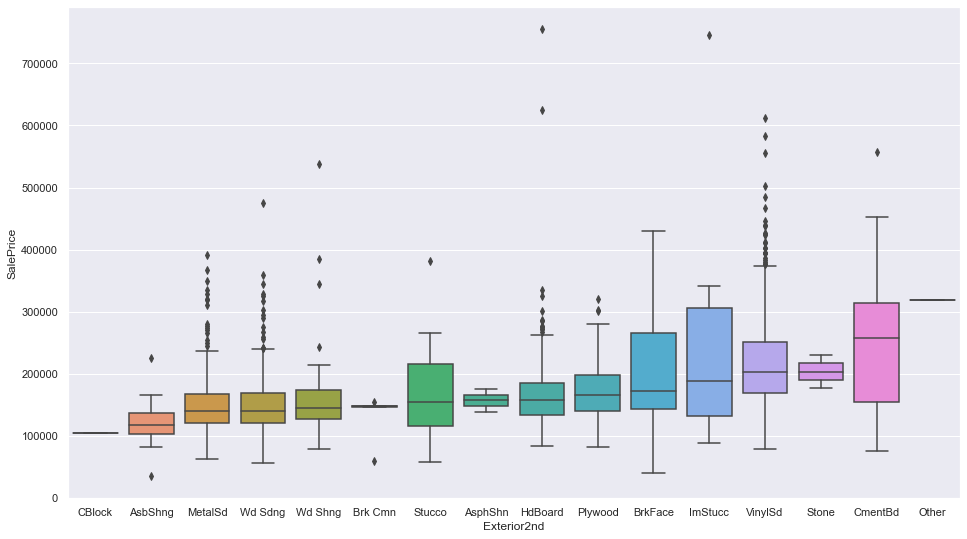

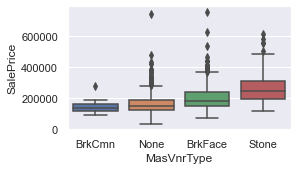

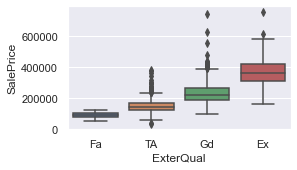

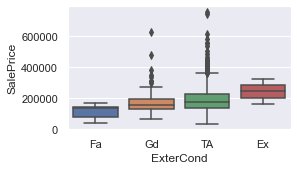

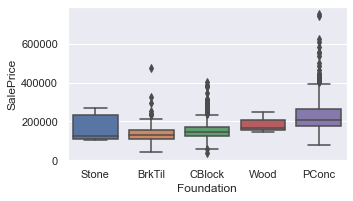

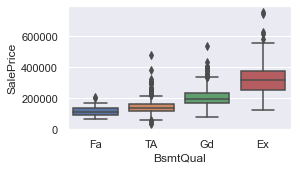

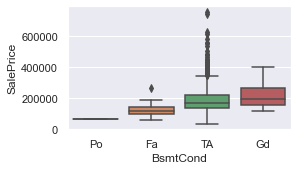

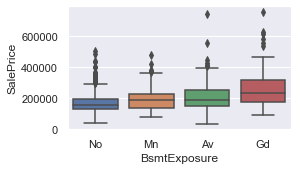

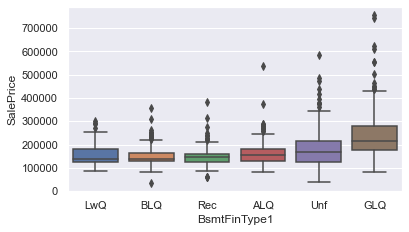

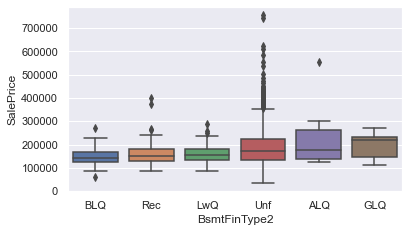

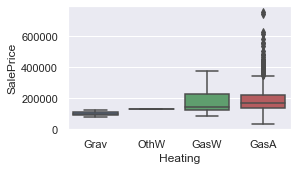

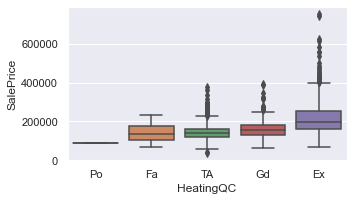

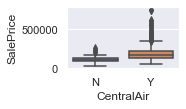

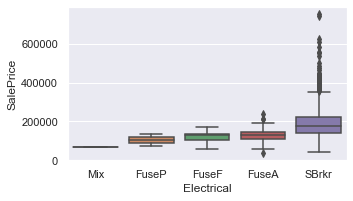

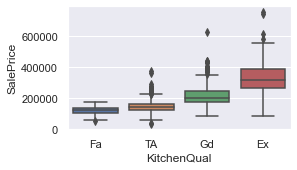

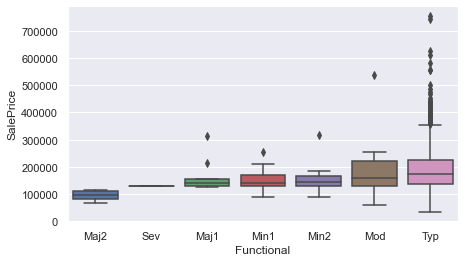

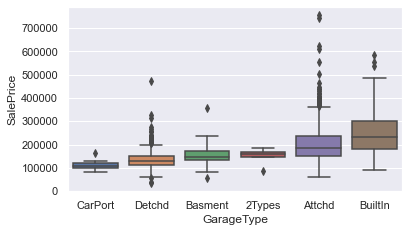

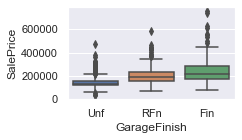

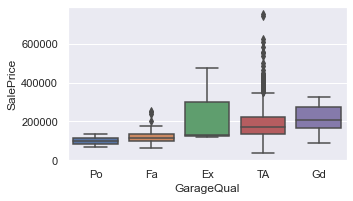

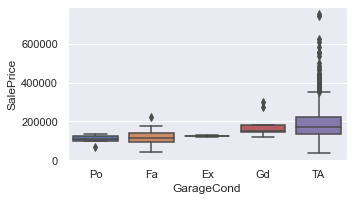

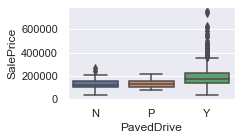

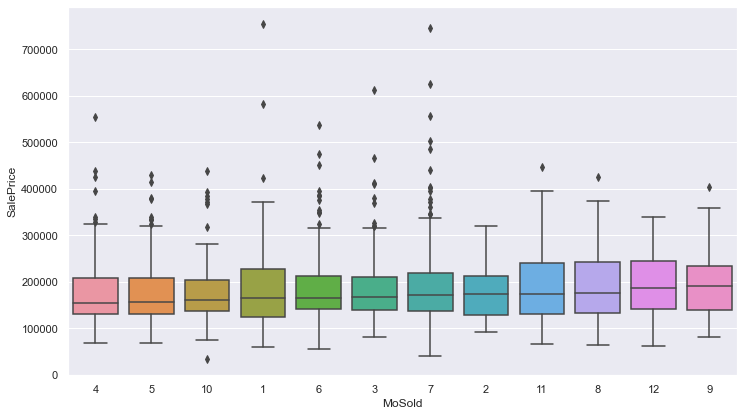

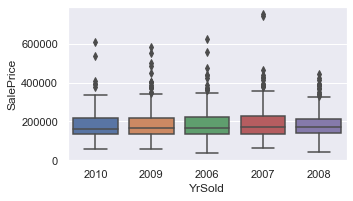

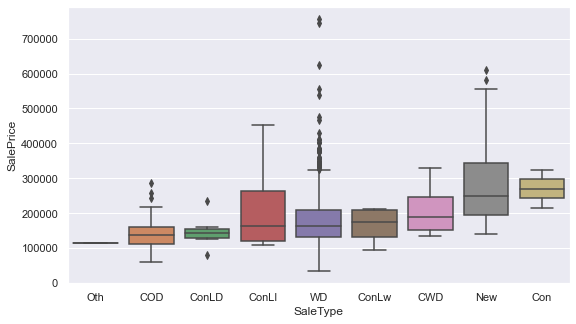

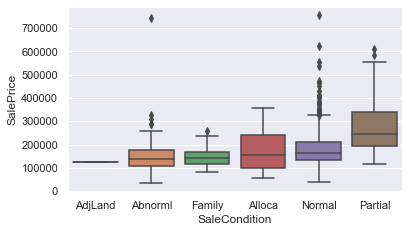

In [26]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, target)

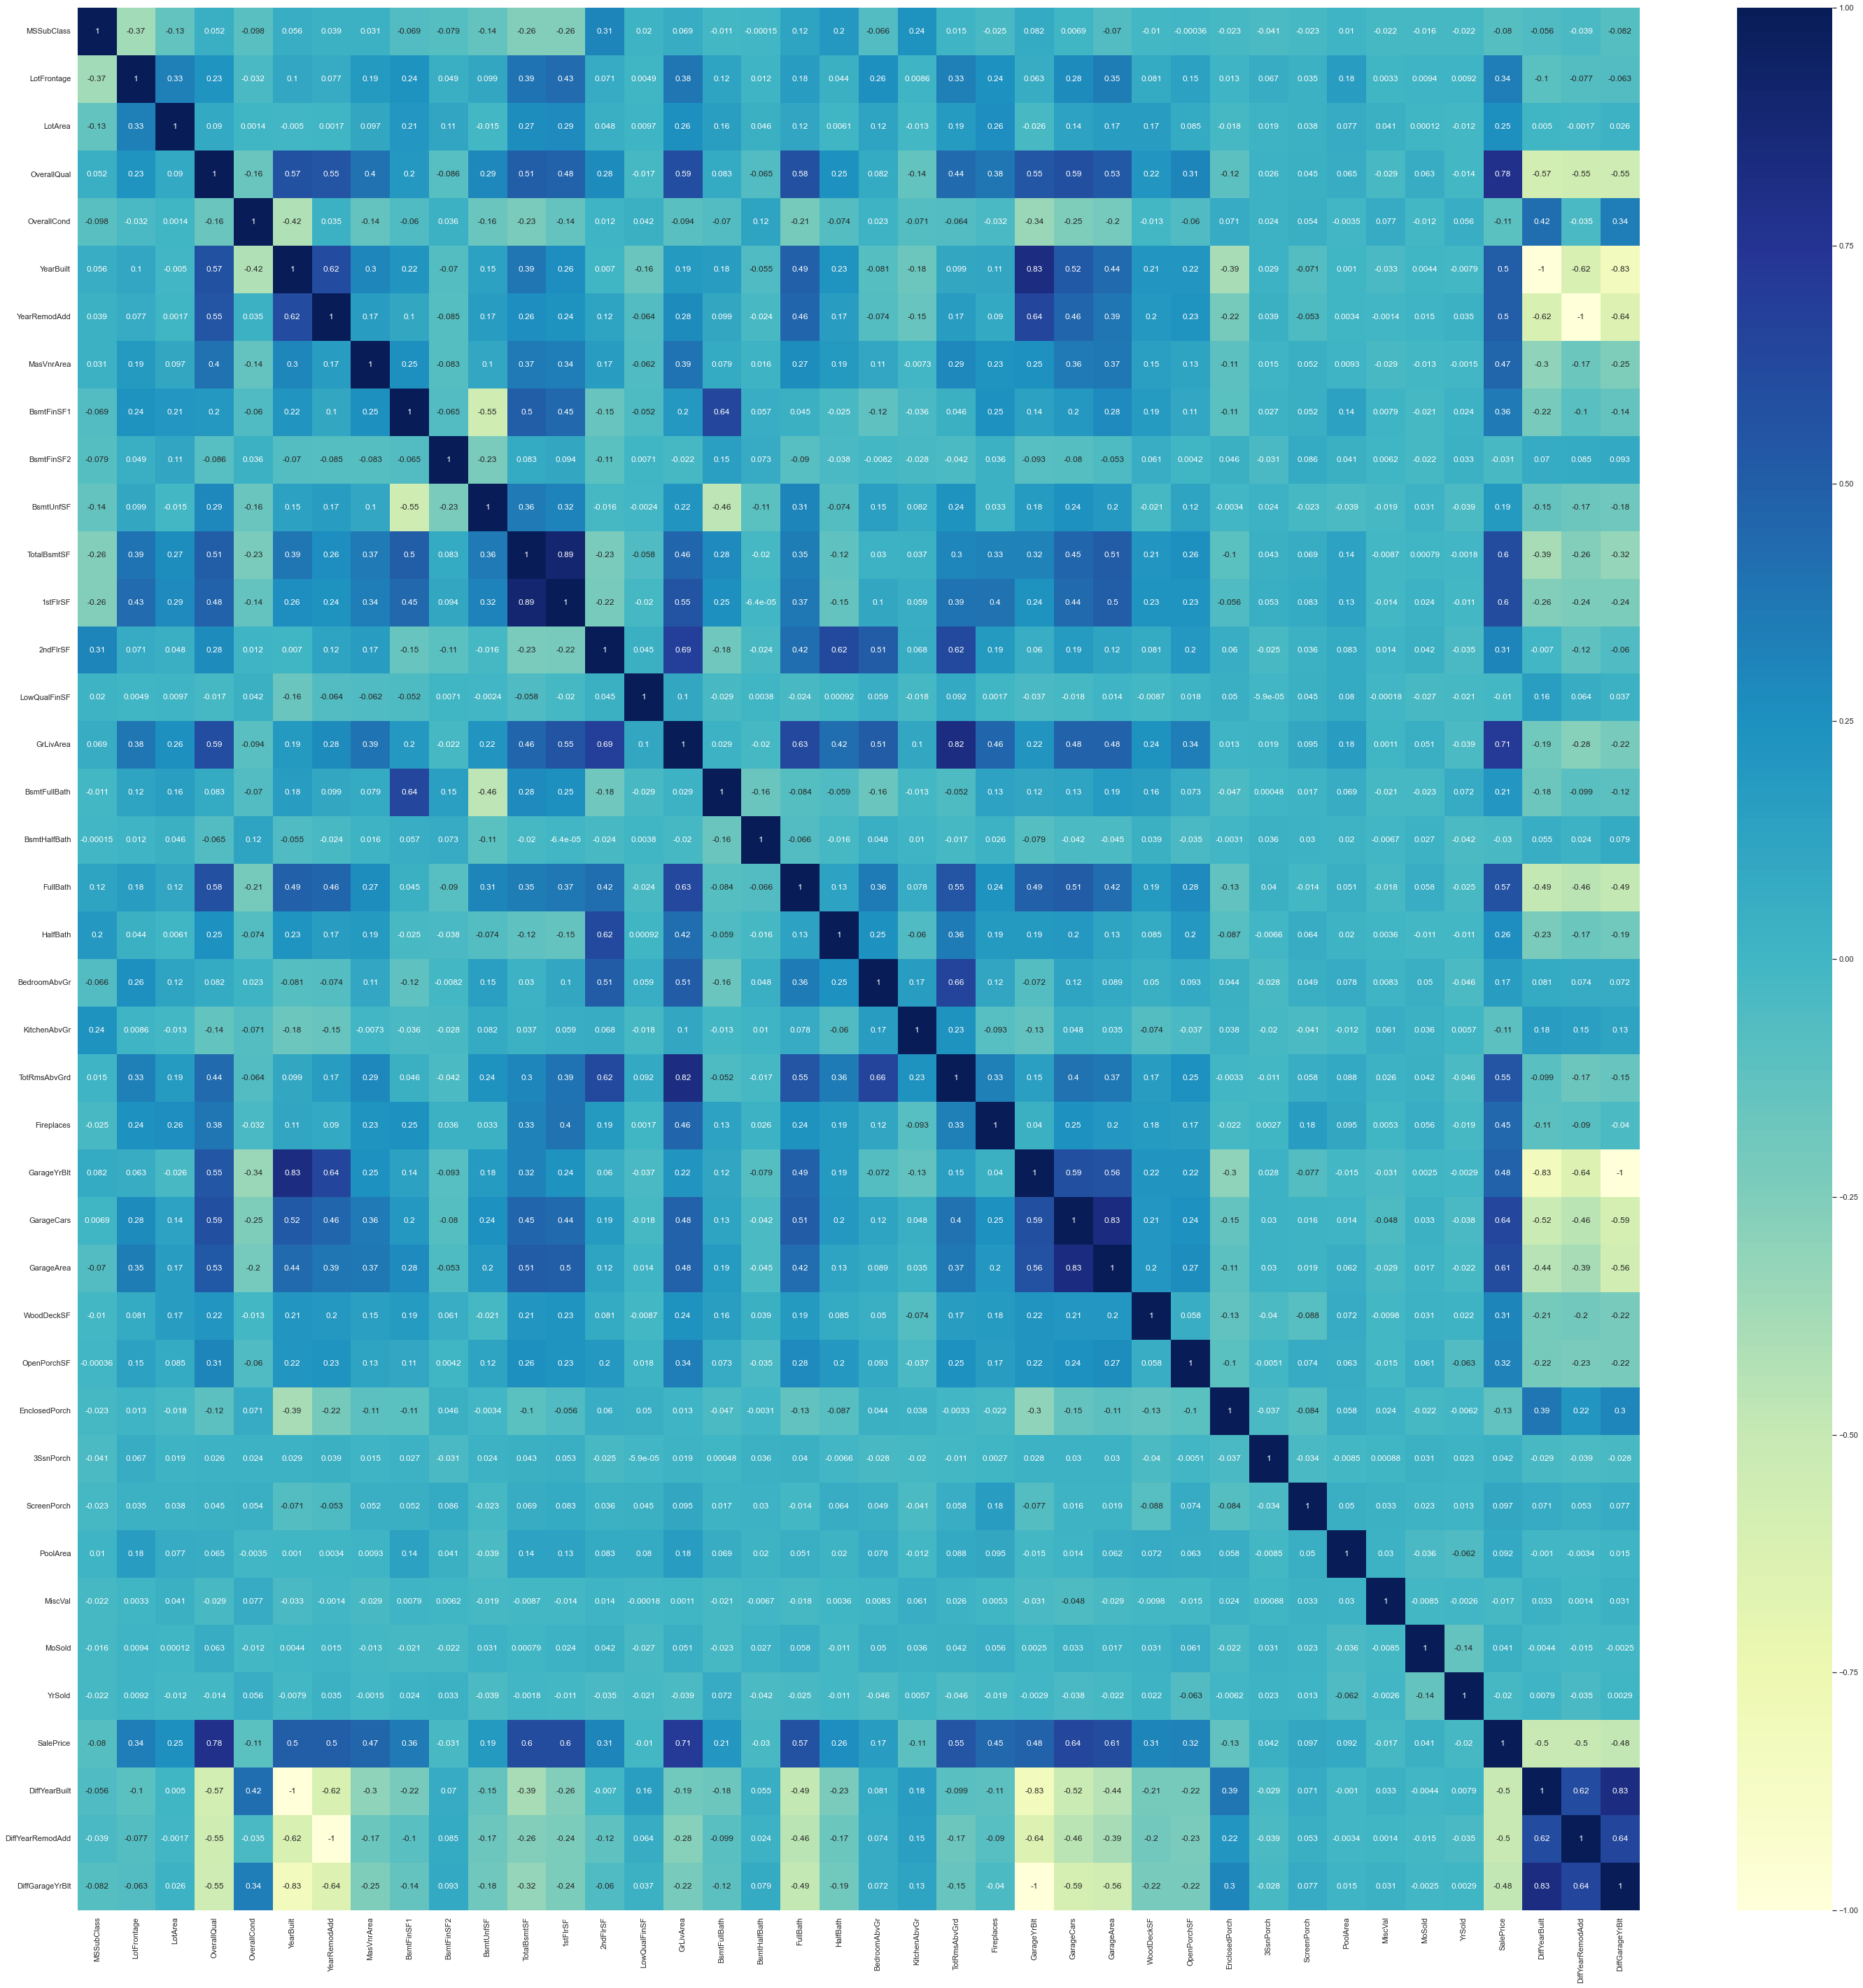

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(50,50))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Observation**:
1. There plots above shows there exist some linear relationship between various columns and output column.
2. The heatmap is condensed however we do have collinearity in data

## Dumify Categorical Fields

In [28]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(data[col], drop_first = True)
    dummies = dummies.add_prefix(f'{col}_')
    data = pd.concat([data, dummies], axis = 1)
    data.drop([col], axis = 1, inplace = True)

data.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 270 columns]

## Data Preparation for Modelling

In [29]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(data[num_col]))
# Outlier Removed Records
selected = data[num_col][(z < 3).all(axis=1)]
data = data.loc[selected.index]
data

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
2            68.0    11250       2001          2002       162.0         486   
4            84.0    14260       2000          2000       350.0         655   
6            75.0    10084       2004          2005       186.0        1369   
10           70.0    11200       1965          1965         0.0         906   
...           ...      ...        ...           ...         ...         ...   
1451         78.0     9262       2008          2009       194.0           0   
1452         35.0     3675       2005          2005        80.0         547   
1454         62.0     7500       2004          2005         0.0         410   
1455         62.0     7917       1999          2000         0.0           0   
1456         85.0    13175       1978          1988       119.0         790   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0              0        150          856       856  ...               0   
2              0        434          920       920  ...               0   
4              0        490         1145      1145  ...               0   
6              0        317         1686      1694  ...               0   
10             0        134         1040      1040  ...               0   
...          ...        ...          ...       ...  ...             ...   
1451           0       1573         1573      1578  ...               0   
1452           0          0          547      1072  ...               0   
1454           0        811         1221      1221  ...               0   
1455           0        953          953       953  ...               0   
1456         163        589         1542      2073  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
2                  0             0             0            1   
4                  0             0             0            1   
6                  0             0             0            1   
10                 0             0             0            1   
...              ...           ...           ...          ...   
1451               0             1             0            0   
1452               0             0             0            1   
1454               0             0             0            1   
1455               0             0             0            1   
1456               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
2                         0                     0                     0   
4                         0                     0                     0   
6                         0                     0                     0   
10                        0                     0                     0   
...                     ...                   ...                   ...   
1451                      0                     0                     0   
1452                      0                     0                     0   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
2                        1                      0  
4                        1                      0  
6                        1                      0  
10                       1                      0  
...                    ...                    ...  
1451                     0                      1  
1452                     1                      0  
1454  

In [30]:
# Preparing Test and Train Set

y = data.loc[:, target]
X = data.loc[:, data.columns != target]

# scale
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 1)

## Performing Simple Linear Regression

In [31]:
# linear regression with all predictors

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict train
y_train_pred = lr.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
# predict test
y_test_pred = lr.predict(X_test)
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
linear = ['linear_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.9494886959071343
Train MSE: 221096258.17913336
Train RMSE: 14869.305907779735
Test R2: 0.8951614037992068
Test MSE: 458851076.58629084
Test RMSE: 21420.8094288309


In [32]:
# Put the Features and coefficienst in a dataframe

linear_df = pd.DataFrame({'Features':X_train.columns, 'linear_Coefficient':lr.coef_.round(4)})
linear_df.reset_index(drop=True, inplace=True)
linear_df

Features  linear_Coefficient
0              LotFrontage             -7.4690
1                  LotArea              1.8226
2                YearBuilt            252.1712
3             YearRemodAdd             32.2483
4               MasVnrArea             -6.7166
..                     ...                 ...
264  SaleCondition_AdjLand          46458.1591
265   SaleCondition_Alloca         -48120.0229
266   SaleCondition_Family           1419.1910
267   SaleCondition_Normal           8557.7286
268  SaleCondition_Partial          36994.6811

[269 rows x 2 columns]

In [33]:
# Simple Linear Regression model parameters
model_parameters = list(lr.coef_)
model_parameters.insert(0, lr.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-299337.633, 'constant'),
 (52122.668, 'SaleType_CWD'),
 (-48120.023, 'SaleCondition_Alloca'),
 (-47128.015, 'OverallQual_3'),
 (46458.159, 'SaleCondition_AdjLand'),
 (-43639.058, 'GarageQual_Po'),
 (-40180.447, 'OverallQual_4'),
 (-40157.656, 'Condition1_PosA'),
 (-39347.13, 'Functional_Mod'),
 (-37279.532, 'BsmtFinType2_GLQ'),
 (36994.681, 'SaleCondition_Partial'),
 (-32478.657, 'OverallQual_6'),
 (-31857.988, 'OverallQual_5'),
 (31127.61, 'Neighborhood_StoneBr'),
 (-29168.631, 'Neighborhood_ClearCr'),
 (-28621.994, 'OverallQual_7'),
 (27484.021, 'Electrical_FuseP'),
 (-27114.107, 'Neighborhood_NWAmes'),
 (-27021.34, 'BldgType_Twnhs'),
 (-26456.747, 'BldgType_TwnhsE'),
 (-25628.725, 'Neighborhood_NAmes'),
 (-25556.244, 'Neighborhood_MeadowV'),
 (-23445.189, 'LotShape_IR3'),
 (-23156.124, 'Neighborhood_Edwards'),
 (-22546.563, 'Exterior1st_BrkComm'),
 (-21880.155, 'Neighborhood_Somerst'),
 (21842.488, 'Foundation_Wood'),
 (-20959.717, 'Neighborhood_Timber'),
 (20727.967, 'HouseStyle

**Observation for linear regression**:
1. Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
2. Simple Linear Regression has not helped us in the feature selection.

## Ridge Regression

In [34]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.015451      0.003862         0.005262        0.001431      0.0001   
1       0.013952      0.000741         0.004525        0.000433       0.001   
2       0.014294      0.003036         0.005632        0.001794        0.01   
3       0.013834      0.000796         0.004718        0.000641        0.05   
4       0.014593      0.003065         0.004287        0.000333         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16990.307860      -17941.540032      -18802.025453   
1   {'alpha': 0.001}      -16982.936616      -17934.436133      -18743.986308   
2    {'alpha': 0.01}      -16928.327173      -17839.162448      -18376.884392   
3    {'alpha': 0.05}      -16696.079829      -17439.998230      -17693.315234   
4     {'alpha': 0.1}      -16422.592343      -17120.939763      -17235.989530   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -16111.700634  ...    -17203.592596     1039.293347               26   
1      -16100.083291  ...    -17182.649639     1027.368409               25   
2      -15992.257368  ...    -17029.603225      958.505588               24   
3      -15609.157120  ...    -16626.639773      861.167720               23   
4      -15261.065374  ...    -16301.557099      817.065331               22   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9511.295009        -9453.670358        -9549.850417   
1        -9511.050084        -9454.544250        -9553.755033   
2        -9508.977273        -9462.507093        -9574.663409   
3        -9512.739929        -9497.831150        -9618.053090   
4        -9527.451692        -9542.097166        -9657.850294   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9860.094551        -9269.649362      -9528.911939       191.472754  
1        -9860.197500        -9270.653671      -9530.040108       191.263102  
2        -9861.821288        -9279.857631      -9537.565339       189.410912  
3        -9876.654318        -9317.531197      -9564.561937       183.535099  
4        -9900.850821        -9351.854007      -9596.020796       181.091762  

[5 rows x 21 columns]

In [36]:
model_cv.best_estimator_

Ridge(alpha=5.0)

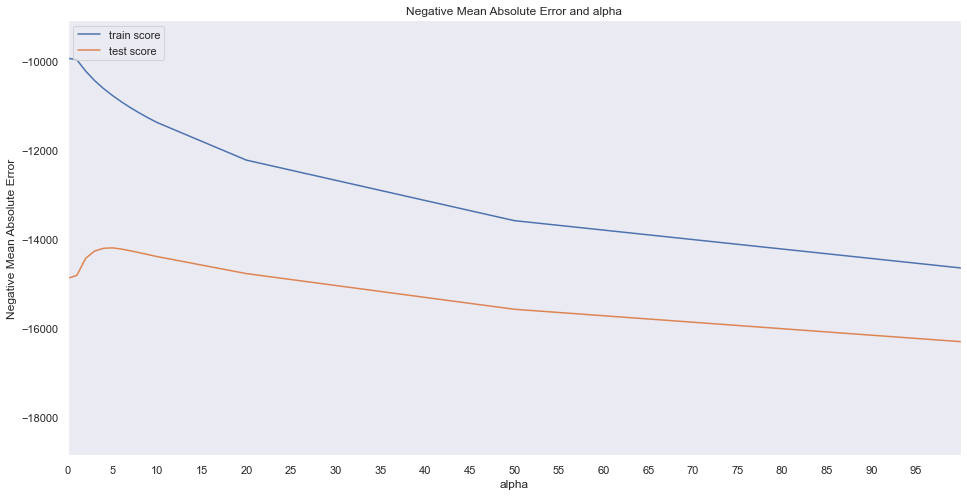

In [37]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [38]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict train
y_train_pred = ridge.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
# predict test
y_test_pred_ridge = ridge.predict(X_test)
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
test_mse = mean_squared_error(y_test,y_test_pred_ridge)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
ridge_list = ['ridge_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.940600388504013
Train MSE: 260001836.71583113
Train RMSE: 16124.572450636671
Test R2: 0.9319783377438102
Test MSE: 297712999.6825118
Test RMSE: 17254.361758190647


In [39]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict train
y_train_pred = ridge.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
# predict test
y_test_pred_ridge = ridge.predict(X_test)
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
test_mse = mean_squared_error(y_test,y_test_pred_ridge)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
ridge_list = ['ridge_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.9351946095095912
Train MSE: 283663817.5273466
Train RMSE: 16842.32221302474
Test R2: 0.9317041672790527
Test MSE: 298912971.9969182
Test RMSE: 17289.09980296598


In [40]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Ridge_Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Ridge_Coefficient
0              LotFrontage            61.7148
1                  LotArea             1.2261
2                YearBuilt           233.3417
3             YearRemodAdd            68.5653
4               MasVnrArea            -3.1894
..                     ...                ...
264  SaleCondition_AdjLand          1958.0566
265   SaleCondition_Alloca         -6518.2528
266   SaleCondition_Family          -871.7185
267   SaleCondition_Normal          4577.1747
268  SaleCondition_Partial         10519.0093

[269 rows x 2 columns]

In [41]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-413620.704, 'constant'),
 (22288.026, 'OverallQual_9'),
 (19824.346, 'Neighborhood_StoneBr'),
 (14940.116, 'Neighborhood_Crawfor'),
 (14416.376, 'Functional_Typ'),
 (-13080.524, 'BsmtQual_Gd'),
 (-11506.79, 'OverallQual_4'),
 (-10783.451, 'KitchenQual_Gd'),
 (10519.009, 'SaleCondition_Partial'),
 (10167.873, 'Neighborhood_NridgHt'),
 (9988.079, 'Exterior1st_BrkFace'),
 (-9869.427, 'BsmtQual_TA'),
 (9791.42, 'BsmtExposure_Gd'),
 (-8784.621, 'OverallQual_6'),
 (-8404.974, 'Neighborhood_Edwards'),
 (-8110.623, 'KitchenQual_TA'),
 (8069.618, 'OverallCond_8'),
 (-7608.081, 'Neighborhood_NWAmes'),
 (7538.064, 'BsmtFinType1_GLQ'),
 (-7307.96, 'OverallCond_5'),
 (-7230.781, 'Functional_Mod'),
 (7215.601, 'SaleType_New'),
 (-7190.307, 'ExterQual_TA'),
 (7186.931, 'MSZoning_FV'),
 (-7011.431, 'Neighborhood_Mitchel'),
 (6811.015, 'OverallQual_8'),
 (-6785.891, 'OverallQual_7'),
 (6726.076, 'OverallQual_10'),
 (-6518.253, 'SaleCondition_Alloca'),
 (-6466.432, 'OverallQual_5'),
 (-6459.404, 'Nei

**Observation for ridge regression**:
1. Ridge regression gave us a complex model with most of the coefficients as non-zero values.
2. Ridge regression has not helped us in the feature selection.

## Lasso Regression

In [42]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.160072      0.069562         0.006176        0.002042      0.0001   
1       0.157804      0.067677         0.004908        0.000592       0.001   
2       0.114593      0.011813         0.005364        0.001305        0.01   
3       0.146051      0.044408         0.005237        0.000971        0.05   
4       0.143401      0.050415         0.005516        0.001661         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17092.695952      -18005.829748      -18481.682456   
1   {'alpha': 0.001}      -17088.287867      -18001.588705      -18478.443492   
2    {'alpha': 0.01}      -17062.043588      -17959.036875      -18443.598336   
3    {'alpha': 0.05}      -17012.637159      -17827.483514      -18404.108820   
4     {'alpha': 0.1}      -16994.886157      -17803.181375      -18380.186103   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -16683.974231  ...    -17335.505646      787.004970               27   
1      -16683.474989  ...    -17331.567534      787.408172               26   
2      -16687.716168  ...    -17296.453983      789.270708               25   
3      -16440.722567  ...    -17169.552494      839.803270               24   
4      -16219.069026  ...    -17108.957098      874.911963               23   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9509.438845        -9460.401473        -9580.925775   
1        -9509.413169        -9460.405768        -9580.917865   
2        -9509.290257        -9460.506242        -9580.878428   
3        -9508.773814        -9460.928640        -9580.516856   
4        -9508.194862        -9461.558702        -9580.143016   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9861.210269        -9273.000125      -9536.995298       191.501780  
1        -9861.206415        -9272.998045      -9536.988252       191.501081  
2        -9861.204698        -9273.159721      -9537.007869       191.449638  
3        -9861.397485        -9273.972318      -9537.117822       191.256115  
4        -9861.694383        -9274.993770      -9537.316946       191.026516  

[5 rows x 21 columns]

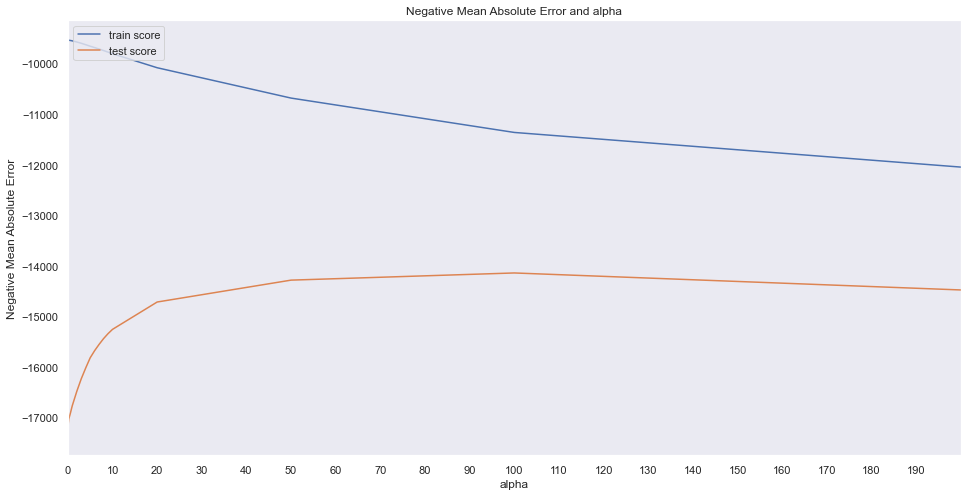

In [44]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [45]:
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict train
y_train_pred = lasso.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
# predict test
y_test_pred_lasso = lasso.predict(X_test)
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
test_mse = mean_squared_error(y_test,y_test_pred_lasso)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
lasso_list = ['lasso_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.934521914599683
Train MSE: 286608313.42084783
Train RMSE: 16929.51013528885
Test R2: 0.9303615100887772
Test MSE: 304789430.8543438
Test RMSE: 17458.219578592307


In [46]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Lasso_Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Lasso_Coefficient
0              LotFrontage            70.9276
1                  LotArea             1.1247
2                YearBuilt           795.3451
3             YearRemodAdd           144.3747
4               MasVnrArea            -2.5187
..                     ...                ...
264  SaleCondition_AdjLand             0.0000
265   SaleCondition_Alloca         -6295.0717
266   SaleCondition_Family            -0.0000
267   SaleCondition_Normal          4981.0827
268  SaleCondition_Partial         20007.4718

[269 rows x 2 columns]

In [47]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1713810.724, 'constant'),
 (46211.422, 'OverallQual_9'),
 (35321.123, 'Neighborhood_StoneBr'),
 (27078.359, 'Neighborhood_Crawfor'),
 (22236.581, 'OverallQual_10'),
 (20007.472, 'SaleCondition_Partial'),
 (19075.467, 'Functional_Typ'),
 (16325.307, 'OverallQual_8'),
 (14953.475, 'Exterior1st_BrkFace'),
 (13222.693, 'Neighborhood_NridgHt'),
 (-12274.204, 'BsmtQual_Gd'),
 (11322.236, 'BsmtExposure_Gd'),
 (9780.182, 'MSZoning_FV'),
 (-9138.35, 'BsmtQual_TA'),
 (-8481.6, 'OverallQual_4'),
 (-8471.371, 'OverallCond_5'),
 (-8266.982, 'KitchenQual_Gd'),
 (7120.125, 'BsmtFinType1_GLQ'),
 (6989.451, 'Neighborhood_BrkSide'),
 (6794.072, 'OverallCond_8'),
 (6428.078, 'Neighborhood_NoRidge'),
 (-6357.985, 'ExterQual_TA'),
 (-6344.871, 'KitchenQual_TA'),
 (-6295.072, 'SaleCondition_Alloca'),
 (-6025.47, 'MSSubClass_160'),
 (5838.194, 'Condition1_Norm'),
 (5253.966, 'ExterCond_TA'),
 (5011.388, 'MasVnrType_Stone'),
 (4981.083, 'SaleCondition_Normal'),
 (4891.99, 'Foundation_PConc'),
 (-4801.349, 

**Observation for lasso regression**:
1. Lasso Regression gave us a simpler model with most of the coefficients as zero values.
2. Lasso Regression has helped us in the feature selection.

## Automated selection of variables for prediction (RFE)

In [48]:
# Running RFE with the output number of the variable equal to 30
rfe = RFE(lr, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'DiffYearBuilt', 'MSSubClass_45', 'MSSubClass_70',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'Street_Pave', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_RRAe', 'HouseStyle_1.5Unf', 'OverallQual_9',
       'OverallQual_10', 'RoofStyle_Mansard', 'RoofMatl_WdShake',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'Heating_Grav', 'SaleType_CWD'],
      dtype='object')

In [50]:
def make_lr_model_mp(cols,):
    cols=list(cols)
        
    # Add a constant
    X_train_lr = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lr).fit()
    
    # Check the parameters obtained
    print('*'*100)
    print(f'Parameters obtained for {cols}')
    print('*'*100)
    print(lr.params)
    print('*'*100,'\n')
    
    # Print a summary of the linear regression model obtained
    print('*'*100)
    print(lr.summary())
    print('*'*100,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('*'*100)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('*'*100)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Model 1:
-Let's consider all the columns selected by RFE for our first model

In [51]:
make_lr_model_mp(list(data[auto_selected_predictors]))

****************************************************************************************************
Parameters obtained for ['YearBuilt', 'DiffYearBuilt', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'Street_Pave', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_RRAe', 'HouseStyle_1.5Unf', 'OverallQual_9', 'OverallQual_10', 'RoofStyle_Mansard', 'RoofMatl_WdShake', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'Heating_Grav', 'SaleType_CWD']
****************************************************************************************************
const                      -0.406472
YearBuilt                  93.938368
DiffYearBuilt            -915.824108
MSSubClass_45          -78382.224132
MSSubClass_70           39790.670655
MSSubClass_90 

#### Model 2:
-Let's consider all the columns selected by Lasso for our second model

In [52]:
make_lr_model_mp(list(data[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'OverallCond_5', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    161509.901793
OverallQual_9            100799.965909
Neighborhood_StoneBr      42236.454738
Neighborhood_Crawfor      32892.565355
OverallQual_10            95

#### Model 3:
-Applying Lasso selected features and removing 'Functional_Typ'

In [53]:
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(data[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'OverallCond_5', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    164888.872906
OverallQual_9            100919.720325
Neighborhood_StoneBr      42385.806286
Neighborhood_Crawfor      32862.624904
OverallQual_10            95431.655074
SaleCon

#### Model 4:
-Applying Lasso selected features and removing 'Neighborhood_Edwards'

In [54]:
lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(data[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    164183.439790
OverallQual_9            100876.414218
Neighborhood_StoneBr      42470.263100
Neighborhood_Crawfor      33166.457373
OverallQual_10            95472.793370
SaleCondition_Partial   

#### Model 5:
-Applying Lasso selected features and removing 'KitchenQual_Gd'

In [55]:
lasso_selected_features.remove('KitchenQual_Gd')
make_lr_model_mp(list(data[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    160926.809731
OverallQual_9            103249.604842
Neighborhood_StoneBr      42807.845801
Neighborhood_Crawfor      33437.108837
OverallQual_10            98777.074813
SaleCondition_Partial     37858.168102
Ove

#### Model 6:
-Applying Lasso selected features and removing 'OverallCond_8'

In [56]:
lasso_selected_features.remove('OverallCond_8')
make_lr_model_mp(list(data[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    161965.634119
OverallQual_9            103079.271203
Neighborhood_StoneBr      42614.622236
Neighborhood_Crawfor      34228.308280
OverallQual_10            98576.660153
SaleCondition_Partial     38033.038490
OverallQual_8       

**Observation for lasso regression after RFE**:
1. Adjusted R-square is also 0.751
2. VIF is fine
3. P value is also good

In [57]:
model = [linear,ridge_list,lasso_list]
model_df = pd.DataFrame(columns=['model_name', 'Train_R2', 'Test_R2', 'Train_MSE', 'Test_MSE', 'Train_RMSE', 'Test_RMSE'], data=model)

In [58]:
model_df

model_name  Train_R2   Test_R2     Train_MSE      Test_MSE  \
0  linear_regression  0.949489  0.895161  2.210963e+08  4.588511e+08   
1   ridge_regression  0.935195  0.931704  2.836638e+08  2.989130e+08   
2   lasso_regression  0.934522  0.930362  2.866083e+08  3.047894e+08   

     Train_RMSE     Test_RMSE  
0  14869.305908  21420.809429  
1  16842.322213  17289.099803  
2  16929.510135  17458.219579

In [59]:
new_df = pd.merge(linear_df,ridge_df,on='Features')
new_df = pd.merge(new_df,lasso_df,on='Features')
new_df

Features  linear_Coefficient  Ridge_Coefficient  \
0              LotFrontage             -7.4690            61.7148   
1                  LotArea              1.8226             1.2261   
2                YearBuilt            252.1712           233.3417   
3             YearRemodAdd             32.2483            68.5653   
4               MasVnrArea             -6.7166            -3.1894   
..                     ...                 ...                ...   
264  SaleCondition_AdjLand          46458.1591          1958.0566   
265   SaleCondition_Alloca         -48120.0229         -6518.2528   
266   SaleCondition_Family           1419.1910          -871.7185   
267   SaleCondition_Normal           8557.7286          4577.1747   
268  SaleCondition_Partial          36994.6811         10519.0093   

     Lasso_Coefficient  
0              70.9276  
1               1.1247  
2             795.3451  
3             144.3747  
4              -2.5187  
..                 ...  
264             0.0000  
265         -6295.0717  
266            -0.0000  
267          4981.0827  
268         20007.4718  

[269 rows x 4 columns]

In [60]:
print(len(new_df[new_df['linear_Coefficient']==0]))
new_df[new_df['linear_Coefficient']==0]

20


Features  linear_Coefficient  Ridge_Coefficient  \
14          BsmtHalfBath                 0.0                0.0   
18          KitchenAbvGr                 0.0                0.0   
29              PoolArea                 0.0                0.0   
59      Utilities_NoSeWa                -0.0                0.0   
100      Condition2_PosA                 0.0                0.0   
101      Condition2_PosN                -0.0                0.0   
102      Condition2_RRAe                 0.0                0.0   
103      Condition2_RRAn                 0.0                0.0   
111    HouseStyle_2.5Fin                 0.0                0.0   
135       RoofStyle_Shed                 0.0                0.0   
137     RoofMatl_Membran                -0.0                0.0   
138       RoofMatl_Metal                -0.0                0.0   
139        RoofMatl_Roll                 0.0                0.0   
151    Exterior1st_Stone                -0.0                0.0   
156  Exterior2nd_AsphShn                 0.0                0.0   
166    Exterior2nd_Stone                -0.0                0.0   
205         Heating_OthW                -0.0                0.0   
208         HeatingQC_Po                -0.0                0.0   
222       Functional_Sev                 0.0                0.0   
262         SaleType_Oth                 0.0                0.0   

     Lasso_Coefficient  
14                 0.0  
18                 0.0  
29                 0.0  
59                 0.0  
100                0.0  
101                0.0  
102                0.0  
103                0.0  
111                0.0  
135                0.0  
137                0.0  
138                0.0  
139                0.0  
151                0.0  
156                0.0  
166                0.0  
205                0.0  
208                0.0  
222                0.0  
262                0.0

In [61]:
print(len(new_df[new_df['Lasso_Coefficient']==0]))
new_df[new_df['Lasso_Coefficient']==0]

159


Features  linear_Coefficient  Ridge_Coefficient  \
14            BsmtHalfBath              0.0000             0.0000   
18            KitchenAbvGr              0.0000             0.0000   
29                PoolArea              0.0000             0.0000   
32        DiffYearRemodAdd            -32.2483           -68.5653   
34           MSSubClass_30            162.9086          1051.8407   
35           MSSubClass_40          20566.6174           442.6750   
36           MSSubClass_45         -16812.6710          1457.4810   
37           MSSubClass_50          -5838.5918          -286.6214   
39           MSSubClass_70          -7577.8954          4509.5970   
40           MSSubClass_75          -9939.7381           132.1286   
41           MSSubClass_80          -4411.9261           426.3136   
42           MSSubClass_85         -19125.1960         -2217.6905   
43           MSSubClass_90         -14553.4002         -2118.7002   
46          MSSubClass_180           5625.5857          -120.1059   
47          MSSubClass_190         -19260.4622         -2597.7944   
49             MSZoning_RH           1849.9649          -389.6215   
50             MSZoning_RL          -5461.3422           542.1529   
52             Street_Pave           5277.0028          3160.9157   
53            LotShape_IR2            976.9062          -363.6258   
54            LotShape_IR3         -23445.1893         -4567.6598   
56         LandContour_HLS           -803.9905          3927.0019   
58         LandContour_Lvl          -2622.4712          -231.5510   
59        Utilities_NoSeWa             -0.0000             0.0000   
62           LotConfig_FR3          -1625.9816          -574.4134   
64           LandSlope_Mod          -1748.2278           353.5821   
65           LandSlope_Sev          13892.4623             2.7719   
66    Neighborhood_Blueste         -15374.7485           301.0950   
67     Neighborhood_BrDale          -1309.0776          4411.8107   
69    Neighborhood_ClearCr         -29168.6306         -4238.5691   
70    Neighborhood_CollgCr         -17454.9027         -3360.1834   
73    Neighborhood_Gilbert         -15031.1874         -4105.5221   
74     Neighborhood_IDOTRR         -10385.4417         -2480.6648   
78    Neighborhood_NPkVill          -4495.7851          3116.7602   
82    Neighborhood_OldTown         -19706.0065         -1351.6066   
83      Neighborhood_SWISU         -19810.9561         -2648.5432   
84     Neighborhood_Sawyer         -18354.0493         -1734.2972   
85    Neighborhood_SawyerW         -15848.8646         -2766.1193   
86    Neighborhood_Somerst         -21880.1546          -297.6943   
88     Neighborhood_Timber         -20959.7170         -3814.8841   
89    Neighborhood_Veenker         -10898.2394          1195.4681   
90        Condition1_Feedr           7631.0091           -30.9687   
92         Condition1_PosA         -40157.6560         -2900.1900   
93         Condition1_PosN          -1468.7091          -462.4572   
94         Condition1_RRAe          -8139.8653         -3066.6742   
95         Condition1_RRAn           6391.6635          -207.9981   
96         Condition1_RRNe          -5415.6788          -773.8128   
97         Condition1_RRNn          -7471.3128          -444.7510   
98        Condition2_Feedr           9106.6233           173.3618   
99         Condition2_Norm          -2896.1788           257.8292   
100        Condition2_PosA              0.0000             0.0000   
101        Condition2_PosN             -0.0000             0.0000   
102        Condition2_RRAe              0.0000             0.0000   
103        Condition2_RRAn              0.0000             0.0000   
104        Condition2_RRNn          -6210.4445          -431.1911   
105        BldgType_2fmCon         -19260.4622         -2597.7944   
106        BldgType_Duplex         -14553.4002         -2118.7002   
107         BldgType_Twnhs         -27021.3397         -4111.5448   
109      HouseSt

In [62]:
print(len(new_df[new_df['Ridge_Coefficient']==0]))
new_df[new_df['Ridge_Coefficient']==0]

20


Features  linear_Coefficient  Ridge_Coefficient  \
14          BsmtHalfBath                 0.0                0.0   
18          KitchenAbvGr                 0.0                0.0   
29              PoolArea                 0.0                0.0   
59      Utilities_NoSeWa                -0.0                0.0   
100      Condition2_PosA                 0.0                0.0   
101      Condition2_PosN                -0.0                0.0   
102      Condition2_RRAe                 0.0                0.0   
103      Condition2_RRAn                 0.0                0.0   
111    HouseStyle_2.5Fin                 0.0                0.0   
135       RoofStyle_Shed                 0.0                0.0   
137     RoofMatl_Membran                -0.0                0.0   
138       RoofMatl_Metal                -0.0                0.0   
139        RoofMatl_Roll                 0.0                0.0   
151    Exterior1st_Stone                -0.0                0.0   
156  Exterior2nd_AsphShn                 0.0                0.0   
166    Exterior2nd_Stone                -0.0                0.0   
205         Heating_OthW                -0.0                0.0   
208         HeatingQC_Po                -0.0                0.0   
222       Functional_Sev                 0.0                0.0   
262         SaleType_Oth                 0.0                0.0   

     Lasso_Coefficient  
14                 0.0  
18                 0.0  
29                 0.0  
59                 0.0  
100                0.0  
101                0.0  
102                0.0  
103                0.0  
111                0.0  
135                0.0  
137                0.0  
138                0.0  
139                0.0  
151                0.0  
156                0.0  
166                0.0  
205                0.0  
208                0.0  
222                0.0  
262                0.0

### Final Feature after RFE for Lasso Reg.

In [63]:
lasso_selected_features

['OverallQual_9',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'OverallQual_10',
 'SaleCondition_Partial',
 'OverallQual_8',
 'Exterior1st_BrkFace',
 'Neighborhood_NridgHt',
 'BsmtQual_Gd',
 'BsmtExposure_Gd',
 'MSZoning_FV',
 'BsmtQual_TA',
 'OverallQual_4',
 'BsmtFinType1_GLQ',
 'Neighborhood_BrkSide',
 'Neighborhood_NoRidge',
 'ExterQual_TA',
 'KitchenQual_TA',
 'SaleCondition_Alloca',
 'MSSubClass_160',
 'Condition1_Norm',
 'ExterCond_TA',
 'MasVnrType_Stone',
 'SaleCondition_Normal',
 'Foundation_PConc',
 'Neighborhood_NWAmes']

## Visualization for prediction and actual values

#### Linear Regression: Actual Vs Pred.

Text(0, 0.5, 'Sales Price')

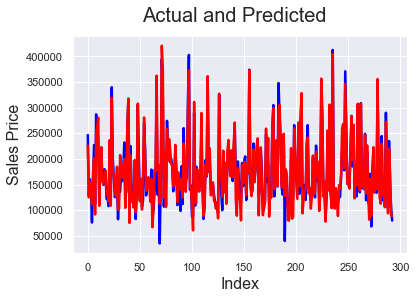

In [64]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=16)                              
plt.ylabel('Sales Price', fontsize=16)                         

#### Ridge Regression: Actual Vs Pred.

Text(0, 0.5, 'Sales Price')

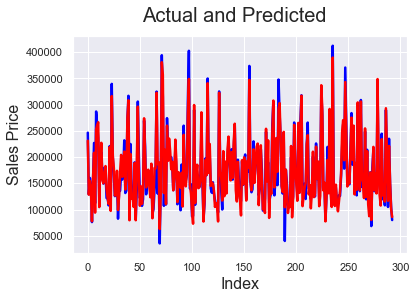

In [65]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=16)                               
plt.ylabel('Sales Price', fontsize=16)                        

#### Lasso Regression: Actual Vs Pred.

Text(0, 0.5, 'Sales Price')

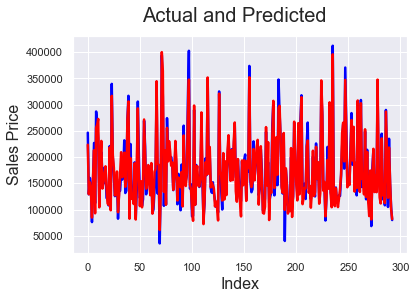

In [66]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=16)                               
plt.ylabel('Sales Price', fontsize=16)                        

## Result and Conclusion
- Optimum value of lambda for Ridge Regression is 5
- Optimum value of lambda for Lasso Regression is 100
- From our initial set of columns, few of the major influencers for Sales Pricing are: 
1. OverallQual
2. Neighborhood
3. SaleCondition
4. BsmtQual
5. BsmtExposure
6. MSZoning
7. Exterior1st
8. BsmtFinType1
9. MSSubClass
10. MasVnrType